# Signal Processing Fundamentals

In [50]:
import numpy as np
from numpy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt
%matplotlib inline

Define the following Sinusoid
$$5e^{j(2/pift)}$$
With a frequency of 1Hz, taking 1000 points/samples over t=1sec

In [51]:
samples = np.linspace(0,1,1000)
complexSig = [5*np.exp(complex(0,1)*2*np.pi*samples)]

### a) Plot the sinusoid real and imaginary components with respect to time as a 3d plot with axis labels. Result should look like image on the right.


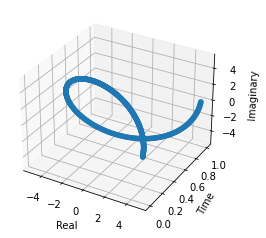

In [52]:
# Plot 
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(np.real(complexSig),samples,np.imag(complexSig))
ax.set_ylabel('Time', rotation = 60)
ax.set_xlabel('Real')
ax.set_zlabel('Imaginary');

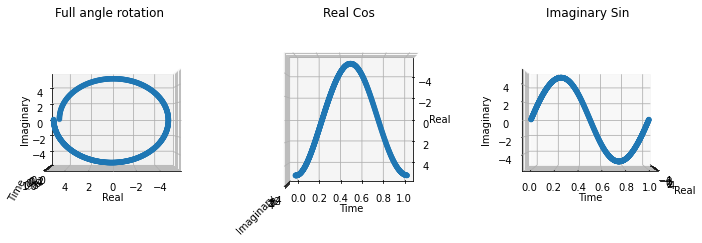

In [53]:
fig = plt.figure(figsize = plt.figaspect(.33)) # makes plot '3' times as wide as tall
# first subplot: See the full circle of the signal
ax = fig.add_subplot(1,3,1, projection = '3d')
ax.scatter3D(np.real(complexSig),samples,np.imag(complexSig))
ax.set_ylabel('Time', rotation = 60)
ax.set_xlabel('Real')
ax.set_zlabel('Imaginary');
ax.view_init(0,90)
plt.title('Full angle rotation')
# 2nd subplot: the real part (cosine)
ax = fig.add_subplot(1,3,2, projection = '3d')
ax.scatter3D(np.real(complexSig),samples,np.imag(complexSig))
ax.set_ylabel('Time')
ax.set_xlabel('Real')
ax.set_zlabel('Imaginary');
ax.view_init(90,0)
plt.title('Real Cos')
# 3rd subplot: Imaginary phase (sin)
ax = fig.add_subplot(1,3,3, projection = '3d')
ax.scatter3D(np.real(complexSig),samples,np.imag(complexSig))
ax.set_ylabel('Time')
ax.set_xlabel('Real')
ax.set_zlabel('Imaginary');
ax.view_init(0,0)
plt.title('Imaginary Sin');

### b) Use angle() and unwrap() to plot the angle with respect to time


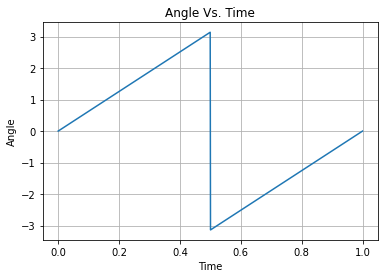

In [54]:
plt.plot( samples,np.angle(complexSig)[0]);
plt.xlabel('Time')
plt.ylabel('Angle')
plt.title('Angle Vs. Time');
plt.grid(True);

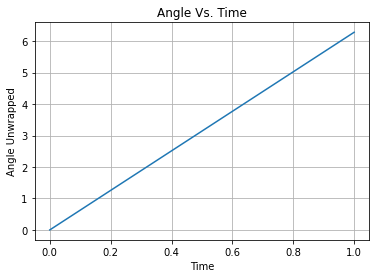

In [55]:
# something seems wrong here
plt.plot( samples,np.unwrap(np.angle(complexSig)[0]));
plt.xlabel('Time')
plt.ylabel('Angle Unwrapped')
plt.title('Angle Vs. Time');
plt.grid(True);

### c) Modify the signal to be a 10Hz signal and use N=100 samples and observe changes


In [113]:
samples = np.linspace(0,1,100)
complexSig = [5*np.exp(complex(0,1)*2*10*np.pi*samples)]

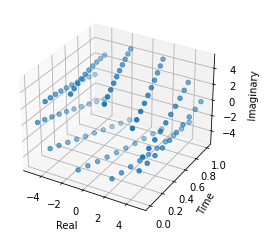

In [114]:
# Plot 
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(np.real(complexSig),samples,np.imag(complexSig))
ax.set_ylabel('Time', rotation = 60)
ax.set_xlabel('Real')
ax.set_zlabel('Imaginary');

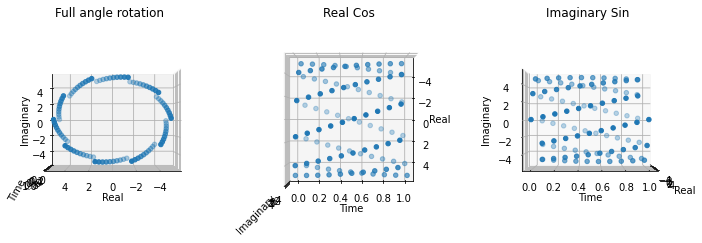

In [115]:
fig = plt.figure(figsize = plt.figaspect(.33)) # makes plot '3' times as wide as tall
# first subplot: See the full circle of the signal
ax = fig.add_subplot(1,3,1, projection = '3d')
ax.scatter3D(np.real(complexSig),samples,np.imag(complexSig))
ax.set_ylabel('Time', rotation = 60)
ax.set_xlabel('Real')
ax.set_zlabel('Imaginary');
ax.view_init(0,90)
plt.title('Full angle rotation')
# 2nd subplot: the real part (cosine)
ax = fig.add_subplot(1,3,2, projection = '3d')
ax.scatter3D(np.real(complexSig),samples,np.imag(complexSig))
ax.set_ylabel('Time')
ax.set_xlabel('Real')
ax.set_zlabel('Imaginary');
ax.view_init(90,0)
plt.title('Real Cos')
# 3rd subplot: Imaginary phase (sin)
ax = fig.add_subplot(1,3,3, projection = '3d')
ax.scatter3D(np.real(complexSig),samples,np.imag(complexSig))
ax.set_ylabel('Time')
ax.set_xlabel('Real')
ax.set_zlabel('Imaginary');
ax.view_init(0,0)
plt.title('Imaginary Sin');

We have created our signal such that we have 10 'cycles' of our waves within our 1 second interval, and also dropped the number of samples by a factor of 10. This has lead to a much less clear noisy picture more representative of data that may be collected in the real world

### d) Define a signal that is only real and another that is only complex ; use plots to show the key difference with (a)

In [124]:
samples = np.linspace(0,1,1000)
realSig = 5*np.cos(samples*2*np.pi)
ImagSig = complex(0,1)*5*np.sin(samples*2*np.pi)
complexSig = [5*np.exp(complex(0,1)*2*np.pi*samples)]

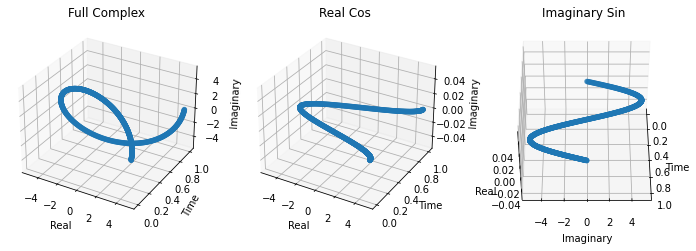

In [138]:
fig = plt.figure(figsize = plt.figaspect(.33)) # makes plot '3' times as wide as tall
# first subplot: See the full circle of the signal
ax = fig.add_subplot(1,3,1, projection = '3d')
ax.scatter3D(np.real(complexSig),samples,np.imag(complexSig))
ax.set_ylabel('Time', rotation = 60)
ax.set_xlabel('Real')
ax.set_zlabel('Imaginary')
plt.title('Full Complex')
# 2nd subplot: the real part (cosine)
ax = fig.add_subplot(1,3,2, projection = '3d')
ax.scatter3D(realSig,samples)
ax.set_ylabel('Time')
ax.set_xlabel('Real')
ax.set_zlabel('Imaginary');
#ax.view_init(90,0)
plt.title('Real Cos')
# 3rd subplot: Imaginary phase (sin)
ax = fig.add_subplot(1,3,3, projection = '3d')
ax.scatter3D( samples, np.imag(ImagSig))
ax.set_ylabel('Imaginary')
ax.set_xlabel('Time')
ax.set_zlabel('Real')
ax.view_init(45,0)
plt.title('Imaginary Sin');

## Day 2 - Frequency Analysis

In [216]:
samples = np.linspace(0,1,100)
complexSigC = [5*np.exp(complex(0,1)*2*10*np.pi*samples)]
Cfft = fft(complexSigC)

### a) plot the fourier transform of the linear phase complex sinusoid from Exercise 1(c); Call it complexSigC for easy reference.

The fftfreq function generates a list of “frequencies”, corresponding to the components of the Fourier transform. It gives $N$ values in the interval (-0.5,0.5). To convert to the actual frequency, you need to divide by $\Delta t$, the sampling interval in time. ($\Delta t = 1$ not needed in our case)

In this plot the x axis is frequency and the y axis is the squared norm of the Fourier transform.

### b) Without specifying x/frequency axis values this plot is meaningless so map the index values to corresponding frequency values the correct result will have highest point on the impulse response correspond to the frequency of our signal, 10Hz in this case.


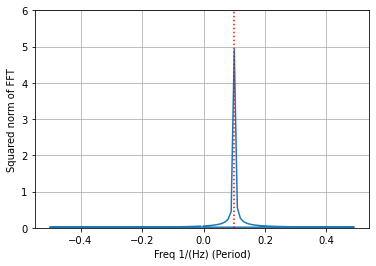

In [221]:
plt.plot(fftfreq(100), np.abs(Cfft)[0]/len(samples));
plt.xlabel('Freq 1/(Hz) (Period)')
plt.ylabel('Amplitude');
plt.ylim(0, 6)
plt.axvline(.1, color = 'red', linestyle = ':')
plt.grid(True);
# we see it is centered at .1, where we had a signal of 10 HZ or a .1s period , ie 10 periods per second

### c) zero pad complexSigC to make it a 200 sample signal instead of 100 samples and take a 200 sample fft on it. Note, Remember to update your frequency axis values using this new value of samples but note that the sampling rate has not changed (we just added zeros) so that will stay the same.


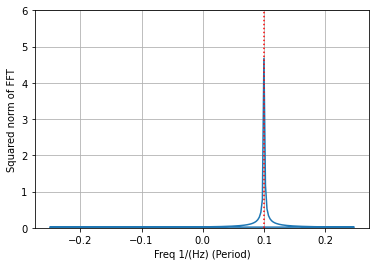

In [224]:
samplesZ = np.linspace(0,2,200) # over two seconds
complexSigCZ = 5*np.exp(complex(0,1)*2*10*np.pi*2*samplesZ) # double the time 
# to keep the sample rate the same
CfftZ = fft(complexSigCZ)
plt.plot(fftfreq(200)/2, np.abs(CfftZ)/len(samplesZ));
plt.ylim(0, 6)
plt.axvline(.1, color = 'red', linestyle = ':')
plt.xlabel('Freq 1/(Hz) (Period)')
plt.ylabel('Squared norm of FFT');
plt.grid(True);

### d) Explain how the output makes sense
Given that we have kept our sampling rate the same but doubled our number of samples, I doubled the time over which the signal takes place to 2 seconds from 1. This had the effect of remaining exactly the same but changing the magnitude of the FFT norm used to express the signal, as we now had twice as many. A potential correction can be seen below to express the magnitude of the samples. 

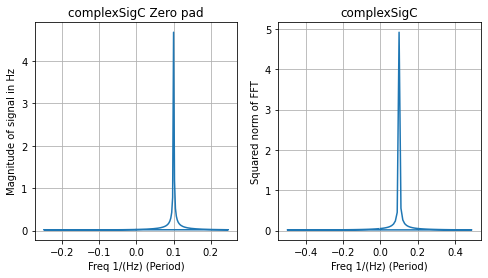

In [129]:
fig = plt.figure(figsize = plt.figaspect(.5))
ax = fig.add_subplot(1,2,1)
# zero padded
plt.plot(fftfreq(200)/2, ((CfftZ.real[0]**2 + CfftZ.imag[0]**2)**(.5))/200)
plt.grid(True);
#plt.ylim(0, 100)
plt.xlabel('Freq 1/(Hz) (Period)')
plt.ylabel('Magnitude of signal in Hz');
plt.title('complexSigC Zero pad')
# original with normalization
ax = fig.add_subplot(1,2,2)
plt.plot(fftfreq(100), ((Cfft.real[0]**2 + Cfft.imag[0]**2)**(.5))/100);
plt.xlabel('Freq 1/(Hz) (Period)')
plt.ylabel('Squared norm of FFT');
plt.grid(True);
#plt.ylim(0, 100)
plt.title('complexSigC');

### e) Create complexSigSum that is a sum of complexSigC and a 22Hz,30Hz, -40Hz sinusoids; analyze the signal in time and frequency and make sure the frequency axis labels are correct


In [110]:
samples = np.linspace(0,1,100)
complexSigC = [5*np.exp(complex(0,1)*2*10*np.pi*samples)]
complexSigSum = (complexSigC + np.sin(2*np.pi*22*samples) + 
                 np.sin(2*np.pi*30*samples) + np.sin(2*np.pi*(-40)*samples))

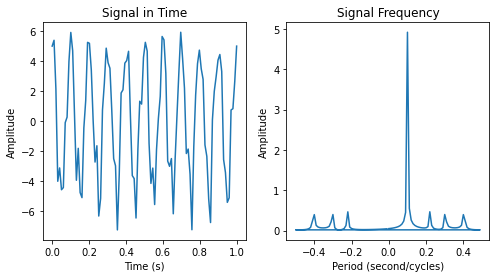

In [230]:
fig = plt.figure(figsize = plt.figaspect(.5))
# Time/Phase
ax = fig.add_subplot(1,2,1)
plt.plot(samples, complexSigSum[0].real)
plt.xlabel('Time (s)')
plt.title('Signal in Time')
plt.ylabel('Amplitude');

# frequency 
ax = fig.add_subplot(1,2,2)
plt.plot(fftfreq(len(samples)),np.abs(fft(complexSigSum)[0])/len(samples));
plt.xlabel('Period (second/cycles)')
plt.title('Signal Frequency')
plt.ylabel('Amplitude');

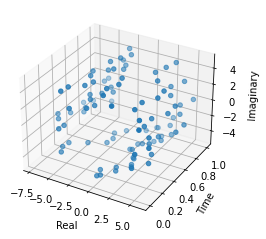

In [93]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(np.real(complexSigSum),samples,np.imag(complexSigSum))
ax.set_ylabel('Time', rotation = 60)
ax.set_xlabel('Real')
ax.set_zlabel('Imaginary');

## Exercise 3 – Write a program to use the Numpy hamming function to create a hamming window (should look like a raised cosine).  
Multiply the hamming window with complexSigC.  It should be a piecewise multiply of a real vector with a complex vector.  
### a) Display the fft of the hamming window, the original sinusoid and the result of the multiplication.  

In [231]:
complexSigH = complexSigC * np.hamming(100)

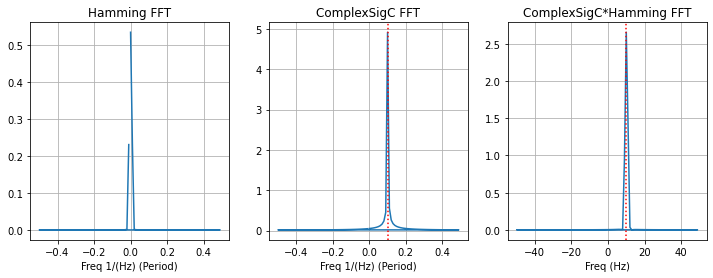

In [236]:
fig = plt.figure(figsize = plt.figaspect(.33))
# Hamming FFT
ax = fig.add_subplot(1,3,1)
plt.plot(fftfreq(100), np.abs(fft(np.hamming(100)))/len(samples))
plt.grid(True);
plt.xlabel('Freq 1/(Hz) (Period)')
plt.title('Hamming FFT');
# ComplexSigC FFT
ax = fig.add_subplot(1,3,2)
plt.plot(fftfreq(100), np.abs(fft(complexSigC)[0])/len(samples))
plt.grid(True);
plt.xlabel('Freq 1/(Hz) (Period)')
plt.axvline(.1, color = 'red', linestyle = ':')
plt.title('ComplexSigC FFT');
# ComplexSigC*Hamming FFT
ax = fig.add_subplot(1,3,3)
plt.plot(fftfreq(100)*100, np.abs(fft(complexSigC*np.hamming(100))[0])/len(samples)) # abs gets norm for complex
plt.grid(True);
plt.xlabel('Freq (Hz)')
plt.axvline(10, color = 'red', linestyle = ':')
plt.title('ComplexSigC*Hamming FFT');


### b) What is the utility of applying a hamming window, note there are various types of windows we can apply to our data

The hamming window helps tighten the signal which is most noticable at the base specifying the 10 hz signal. 



### c) Repeat a-b on complexSigSum

In [237]:
complexSigSumH = complexSigSum * np.hamming(100)

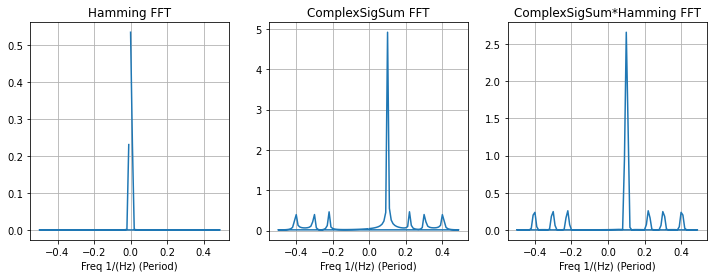

In [239]:
fig = plt.figure(figsize = plt.figaspect(.33))
# Hamming FFT
ax = fig.add_subplot(1,3,1)
plt.plot(fftfreq(100), np.abs(fft(np.hamming(100)))/len(samples))
plt.grid(True);
plt.xlabel('Freq 1/(Hz) (Period)')
plt.title('Hamming FFT');
# ComplexSigC FFT
ax = fig.add_subplot(1,3,2)
plt.plot(fftfreq(100), np.abs(fft(complexSigSum)[0])/len(samples))
plt.grid(True);
plt.xlabel('Freq 1/(Hz) (Period)')
plt.title('ComplexSigSum FFT');
# ComplexSigC*Hamming FFT
ax = fig.add_subplot(1,3,3)
plt.plot(fftfreq(100), np.abs(fft(complexSigSumH)[0])/len(samples)) # abs gets norm for complex
plt.grid(True);
plt.xlabel('Freq 1/(Hz) (Period)')
plt.title('ComplexSigSum*Hamming FFT');

The hamming filter has helped define the frequency ranges used and kept them tighter along the base giving a clearer view of the larger 10hz signal, with the 22Hz, 30Hz and -40Hz signal all present. The sin waves are reflected as both positive and negative values whereas the complex signal is only at the specified frequency range

## Exercise 4
### a) Multiply a linear phase complex sinusoid by another linear phase complex sinusoid with a different phase slope, plot the fft


In [240]:
complexSigC = [5*np.exp(complex(0,1)*2*10*np.pi*samples)]
CSigP = [5*np.exp(complex(0,1)*2*(-30)*np.pi*samples)]
CsigM = complexSigC[0] * CSigP[0]

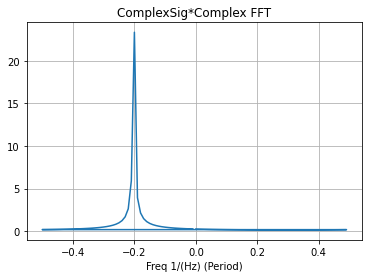

In [242]:
plt.plot(fftfreq(100), np.abs(fft(CsigM))/len(samples))
plt.grid(True)
plt.xlabel('Freq 1/(Hz) (Period)')
plt.title('ComplexSig*Complex FFT');

### b) Vary the phase slope and observe what happens to the fft of the two multiplied sinusoids? What is the relationship explaining what is going on?

In [243]:
CSigA = [5*np.exp(complex(0,1)*2*(-30)*np.pi*samples)]
CSigB = [5*np.exp(complex(0,1)*2*(30)*np.pi*samples)]
CSigC = [5*np.exp(complex(0,1)*2*(10)*np.pi*samples)]
CSigD = [5*np.exp(complex(0,1)*2*(50)*np.pi*samples)]


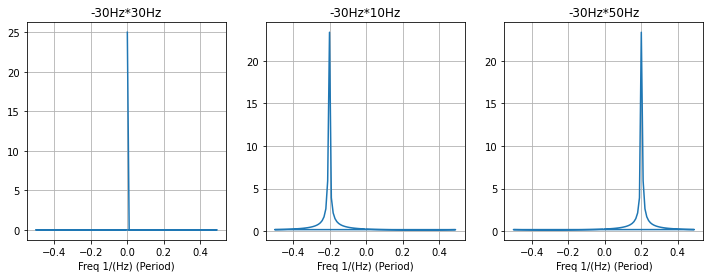

In [245]:
fig = plt.figure(figsize = plt.figaspect(.33))
# 
ax = fig.add_subplot(1,3,1)
plt.plot(fftfreq(100), np.abs(fft(CSigA[0]*CSigB[0]))/len(samples))
plt.grid(True);
plt.xlabel('Freq 1/(Hz) (Period)')
plt.title('-30Hz*30Hz');
# 
ax = fig.add_subplot(1,3,2)
plt.plot(fftfreq(100), np.abs(fft(CSigA[0]*CSigC[0]))/len(samples))
plt.grid(True);
plt.xlabel('Freq 1/(Hz) (Period)')
plt.title('-30Hz*10Hz');
# ComplexSigC*Hamming FFT
ax = fig.add_subplot(1,3,3)
plt.plot(fftfreq(100), np.abs(fft(CSigA[0]*CSigD[0]))/len(samples)) # abs gets norm for complex
plt.grid(True);
plt.xlabel('Freq 1/(Hz) (Period)')
plt.title('-30Hz*50Hz');

From the above we can note that each fft for the multiplied sinusoids has an additive affect on the signals frequency. $-30+30=0, -30+10 = -20, -30+50 = 20$ respectively above noting that due to convention -30*-50 would show as 20 as well since -80 crosses the boundary at -50 and walks back to 20. 

### c) Create a signal with a quadratic phase and observe its behavior in time and frequency

The literature I could find implied that a quadratic phase signal is a signal which has the relation that the frequencies are composite from atleast two other signals and likewise with the phase. This is expressed as an additive property but given the observations with mutliplication I assume the word composite is appropriate. Most literature I could find related to quadratic phase coupling and the composition of signals.

Update: further study implied quadratic phase could be accomplished through squaring the time variable/sampling which looks more like what I would expect to see. 

In [270]:
samples = np.linspace(0,10,1000) # increase number of samples to see more of the wave, 10 periods
CSigQ = (np.exp(complex(0,1)*2*(1)*np.pi*samples**2)) # 10 + 50 should be 60hz

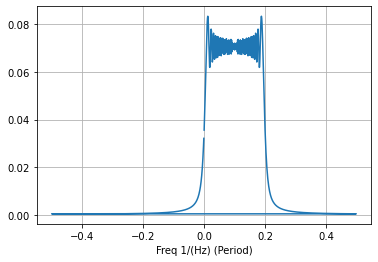

In [273]:
plt.plot(fftfreq(1000), np.abs(fft(CSigQ))/len(samples))
plt.grid(True);
plt.xlabel('Freq 1/(Hz) (Period)');

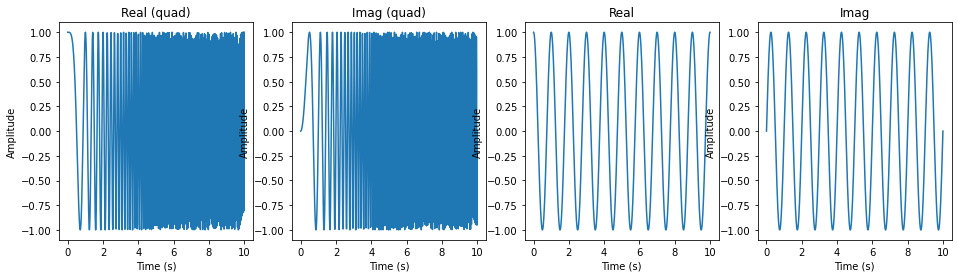

In [260]:
fig = plt.figure(figsize = plt.figaspect(.25))
ax = fig.add_subplot(1,4,1)
plt.plot(samples, CSigQ.real)
plt.xlabel('Time (s)')
plt.title('Real (quad)')
plt.ylabel('Amplitude');
#
ax = fig.add_subplot(1,4,2)
plt.plot(samples, CSigQ.imag)
plt.xlabel('Time (s)')
plt.title('Imag (quad)')
plt.ylabel('Amplitude');

CSig = (np.exp(complex(0,1)*2*(1)*np.pi*samples))
ax = fig.add_subplot(1,4,3)
plt.plot(samples, CSig.real)
plt.xlabel('Time (s)')
plt.title('Real')
plt.ylabel('Amplitude');
#
ax = fig.add_subplot(1,4,4)
plt.plot(samples, CSig.imag)
plt.xlabel('Time (s)')
plt.title('Imag')
plt.ylabel('Amplitude');

## Day 3 - Sampling Fundamentals 

Shannon Nyquist sampling theorem specifies we must sample signal at 2x highest anticipated frequency component in our signal of interest.

*If a function ${\displaystyle x(t)}$ contains no frequencies higher than B hertz, it is completely determined by giving its ordinates at a series of points spaced ${\displaystyle 1/(2B)}$ seconds apart.*

*A sufficient sample-rate is therefore anything larger than ${\displaystyle 2B}$ samples per second. Equivalently, for a given sample rate ${\displaystyle f_{s}}$, perfect reconstruction is guaranteed possible for a bandlimit ${\displaystyle B<f_{s}/2}$.*

### Exercise 5 – Create a Python script to generate the following
Unit amplitude, 50kHz signal sampled at 200kHz rate 



In [401]:
rate = 200000
samples = np.linspace(0,1,rate) # sample rate, 200kHz (over 1 second)
f = 50000 # frequency in hz
CSig = (np.exp(complex(0,1)*2*(f)*np.pi*samples)) # 

#### a)Demonstrate how the signal is adequately sampled with frequency and time plots and labels; what would an under-sampled signal look like?


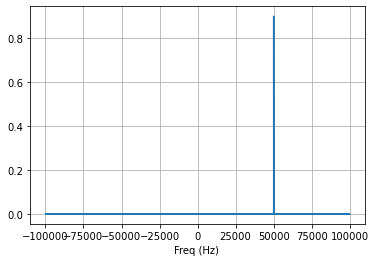

In [402]:
plt.plot(fftfreq(rate, d = 1/rate), np.abs(fft(CSig))/len(samples))
plt.grid(True);
plt.xlabel('Freq (Hz) '); # 

The signal is completely tuned to a single value with very little spread at the base of the signal. A wider signal that is not as certain is expected with an under-sampled signal

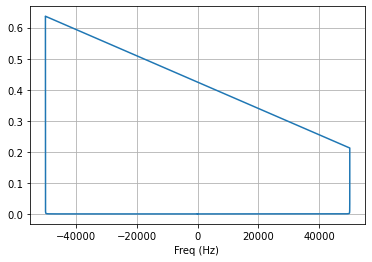

In [278]:
# undersampled example
rate = 100000
samples = np.linspace(0,1,rate) # sample rate, 200kHz (over 1 second)
f = 50000 # frequency in hz
CSig = (np.exp(complex(0,1)*2*(f)*np.pi*samples)) # 

plt.plot(fftfreq(rate, d = 1/rate), np.abs(fft(CSig))/len(samples))
plt.grid(True);
plt.xlabel('Freq (Hz) '); # 

#### b)create a signal that is critically sampled and compare with an over sampled signal

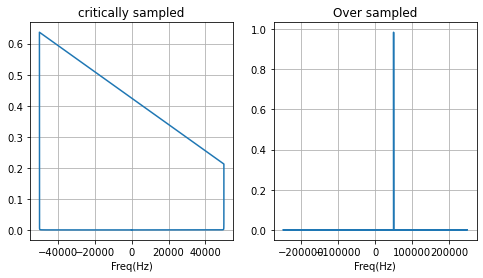

In [297]:
# oversampled example
rate = 100000
samples = np.linspace(0,1,rate)
f = 50000 # frequency in hz
fig = plt.figure(figsize = plt.figaspect(.5))
ax = fig.add_subplot(1,2,1)
# critically sampled example
CSigO = (np.exp(complex(0,1)*2*(f)*np.pi*samples)) # 
plt.plot(fftfreq(rate, d = 1/rate), np.abs(fft(CSigO))/len(samples)) # sample rate is 2x the frequency, which is considered the critical frequency. 
plt.grid(True);
plt.xlabel('Freq(Hz)') # 
plt.title('critically sampled')

# OverSampled 
ax = fig.add_subplot(1,2,2)
samples = np.linspace(0,1,rate*5) # sample much more than needed: 10x the frequency
CSigC = (np.exp(complex(0,1)*2*(f)*np.pi*samples)) # 
plt.plot(fftfreq(rate*5, d = 1/(5*rate)), np.abs(fft(CSigC))/len(samples))
plt.grid(True);
plt.title('Over sampled')
plt.xlabel('Freq(Hz)'); # 

The critically sampled signal is essentially entirely lost and unable to be deciphered. 

# Day 4 - Other Fundamentals

## excercise 6 - write python script to do the following 

### a) Create an over-sampled signal and add noise calculate the snr (signal-to-noise ratio) of the signal’s frequency response. Show the frequency spectrum


In [386]:
 # will use to get SNR
# taken from scipy old documentation https://github.com/scipy/scipy/blob/v0.14.0/scipy/stats/stats.py#L1864
# per wiki this definition below is only good for signals bounded above 0 stated as: 'Notice that such an alternative definition is only useful 
# for variables that are always non-negative (such as photon counts and luminance), and it is only an approximation'

# which does not seem correct for our RF frequencies which are symetric and more for image processing/ machine learning 
def signaltonoise(a, axis=0, ddof=0):
    """
    The signal-to-noise ratio of the input data.
    Returns the signal-to-noise ratio of `a`, here defined as the mean
    divided by the standard deviation.
    Parameters
    ----------
    a : array_like
        An array_like object containing the sample data.
    axis : int or None, optional
        If axis is equal to None, the array is first ravel'd. If axis is an
        integer, this is the axis over which to operate. Default is 0.
    ddof : int, optional
        Degrees of freedom correction for standard deviation. Default is 0.
    Returns
    -------
    s2n : ndarray
        The mean to standard deviation ratio(s) along `axis`, or 0 where the
        standard deviation is 0.
    """
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)


 per wikipedia https://en.wikipedia.org/wiki/Signal-to-noise_ratio#:~:text=Signal%2Dto%2Dnoise%20ratio%20(,power%2C%20often%20expressed%20in%20decibels.
for a signal which is a random variable and noise N that is random the equation/function should look as follows, Expected value of squared signal over expected value of squared Noise N



$$ SNR = \frac{E[S^2]}{E[N^2]}$$

I will take our sin cos signals to be a form of random variable with time to make the assumptions above work

Need to separate the signals first using ICA and then either integrate to get their sum for the SNR (Expected value can be thought of as the integral with respect to time given our random variables)

In [ ]:
# would like to create a function to take in the signal, find the amplitude of the signal, the amplitude of the noise and determine SNR=As - An, 
# or from orginal signals from as described above 

def SNR(a, axis = 0, ddof = 0):
return None  

In [390]:
# oversampled example
rate = 150000
samples = np.linspace(0,1,rate) # over 1 second 
f = 1 # frequency in hz
MySig = np.sin(samples*f*5) # 5hz frequency
CSigO = 5*(np.exp(complex(0,1)*2*(f)*np.pi*samples))
CSigNoise = np.random.normal(0, np.std(CSigO),samples.shape[0])*.1 # 10% of the values std(CSigO) is the amplitude value ~5 or adding around .5 noise 
MySigNoise = np.random.normal(0, np.std(MySig), samples.shape[0])*.1 # 10%
CSigWNoise = CSigO+CSigNoise
MySigWNoise = MySig + MySigNoise
#plt.plot(fftfreq(rate, d = 1/rate), np.abs(fft(CSigWNoise))/len(samples)) # sample rate is 2x the frequency, which is considered the critical frequency. 
#plt.grid(True);
#plt.xlabel('Freq(Hz)') # 
#plt.title('critically sampled');

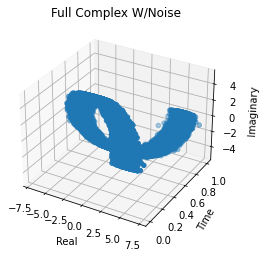

In [333]:
# complex version 
fig = plt.figure() # makes plot '3' times as wide as tall
# first subplot: See the full circle of the signal
ax = fig.add_subplot(1,1,1, projection = '3d')
ax.scatter3D(np.real(CSigWNoise),samples,np.imag(CSigWNoise))
ax.set_ylabel('Time', rotation = 60)
ax.set_xlabel('Real')
ax.set_zlabel('Imaginary')
plt.title('Full Complex W/Noise');

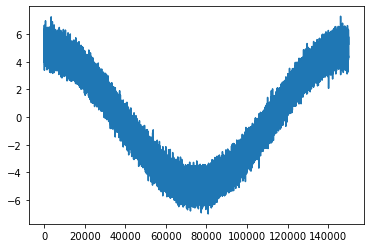

In [334]:
# real version
plt.plot(CSigWNoise.real);

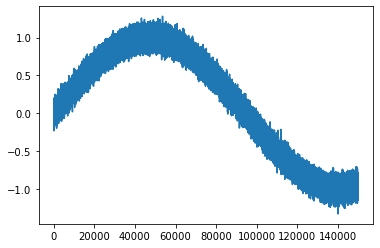

In [393]:
plt.plot(MySigWNoise); # 5 Hz signal

In [394]:
SNR = (np.abs(CSigO)**2).mean()/(CSigNoise**2).mean()
SNR

99.45944974063232

In [392]:
10*np.log10(signaltonoise(MySigWNoise))

-6.983669449696009

In [397]:
10*np.log10(signaltonoise(np.abs(CSigWNoise)))

11.515813843234792

array(14.17690354)

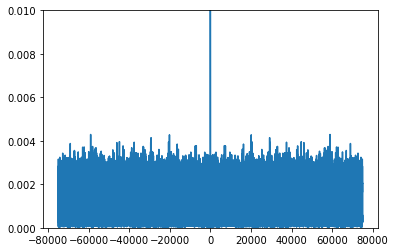

In [363]:
plt.plot(fftfreq(rate, d = 1/(rate)), np.abs(fft(CSigWNoise))/len(samples)) # main frequency is at 1
plt.ylim(0, .010); # can see the noise, not sure how to integrate it through for the total value

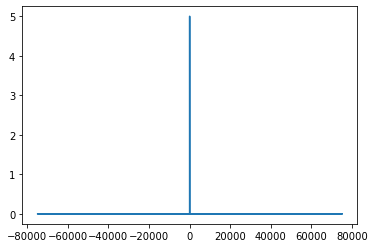

In [396]:
plt.plot(fftfreq(rate, d = 1/(rate)), np.abs(fft(CSigWNoise))/len(samples))

### b) Down-sample the signal (take every-other sample) in the time domain and calculate the snr. Show the fft


### c) Circularly shift your frequency data such that the frequency spectrum is centered at our signal of interest and apply a rectangular window/ sin(x)/x filter that spans half of your data show the fft and compare the snr to the non-filtered, down sampled signal in part(b). Both (b) and (c) reduce the data by a factor of two but explain how (b) and (c) are fundamentally different operations; which is the preferred/robust down-sampling method?


In [382]:
import sys
#np.set_printoptions(threshold=sys.maxsize)
#(np.abs(fft(CSigWNoise))/len(samples))

### d) Repeat this exercise for the sum signal from Exercise 2(e), complexSigSum, trying to maintain the -45Hz signal. What phenomenon are we trying addressing in one of the methods and not in the other?

# Day 5 or Extra Credit

### 1. Write a python Implementation of the Hilbert transform; Verify correct function by providing a real input and checking that the output is a complex representation of that data; show example and supporting plots



### 2. If you haven’t don’t so already, apply exercises 1-a,b;2-b,c,d on complexSigSum


### 3. Develop additional exercises to help with future signal processing week exercises